In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Airline_data.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
#Copy the dataset
df1 = df.copy()
df1.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
#Object columns
# Gender,Customer Type,Type of Travel,Class,Flight Distance,Satisfaction 

In [6]:
df.describe()

,ID,Age,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#missing values
df.isnull().sum()/len(df)*100

ID                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Customer Type                             0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    0.000000
Ease of Online Booking                    0.000000
Check-in Service                          0.000000
Online Boarding                           0.000000
Gate Location                             0.000000
On-board Service                          0.000000
Seat Comfort                              0.000000
Leg Room Service                          0.000000
Cleanliness                               0.000000
Food and Drink                            0.000000
In-flight Service              

In [8]:
#Impute missing values for column Departure and Arrival Time Convenience
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].median())

In [9]:
#Again checking for the missing values
df.isnull().sum()/len(df)*100

ID                                        0.0
Gender                                    0.0
Age                                       0.0
Customer Type                             0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment           

In [10]:
df['Gender'].value_counts()#data balanced

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [11]:
df['Customer Type'].value_counts()

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

In [12]:
df['Type of Travel'].value_counts()

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

In [13]:
df['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

In [14]:
df['Flight Distance']= pd.to_numeric(df['Flight Distance'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129877 non-null  float64
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [15]:
df.isnull().sum()/len(df)*100

ID                                        0.00000
Gender                                    0.00000
Age                                       0.00000
Customer Type                             0.00000
Type of Travel                            0.00000
Class                                     0.00000
Flight Distance                           0.00231
Departure Delay                           0.00000
Arrival Delay                             0.00000
Departure and Arrival Time Convenience    0.00000
Ease of Online Booking                    0.00000
Check-in Service                          0.00000
Online Boarding                           0.00000
Gate Location                             0.00000
On-board Service                          0.00000
Seat Comfort                              0.00000
Leg Room Service                          0.00000
Cleanliness                               0.00000
Food and Drink                            0.00000
In-flight Service                         0.00000


In [16]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129877.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.312249,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.433388,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
df['Flight Distance']=df['Flight Distance'].fillna(df['Flight Distance'].median())

In [18]:
df['Flight Distance'].isna().sum()/len(df)*100

0.0

In [19]:
df['Satisfaction'].value_counts()#Target column Data balanced

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

In [20]:
#Convert Class to categories
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

In [21]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Economy,Class_Economy Plus
0,1,Male,48,First-time,Business,821.0,2,5.0,3,3,...,2,5,5,5,3,5,5,Neutral or Dissatisfied,False,False
1,2,Female,35,Returning,Business,821.0,26,39.0,2,2,...,5,5,3,5,2,5,5,Satisfied,False,False
2,3,Male,41,Returning,Business,853.0,0,0.0,4,4,...,3,5,5,3,4,3,3,Satisfied,False,False
3,4,Male,50,Returning,Business,1905.0,0,0.0,2,2,...,5,4,4,5,2,5,5,Satisfied,False,False
4,5,Female,49,Returning,Business,3470.0,0,1.0,3,3,...,4,5,4,3,3,3,3,Satisfied,False,False


In [22]:
#Gender,Customer Type,Type of Travel,Class,Satisfaction 
# df['Gender'] = df['Gender'].cat.codes
# df['Customer Type'] = df['Customer Type'].cat.codes

In [23]:
#encoding object columns
def encoding(col):
    
    if (df[col].dtypes==object or df[col].dtypes==bool):
        
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
    else: 
        pass
               
for i in list(df.columns[1:]):
    
    encoding(i)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  int8   
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  int8   
 4   Type of Travel                          129880 non-null  int8   
 5   Flight Distance                         129880 non-null  float64
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [25]:
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Economy,Class_Economy Plus
129875,129876,1,28,1,1,447.0,2,3.0,4,4,...,4,4,4,5,4,4,4,0,0,1
129876,129877,1,41,1,1,308.0,0,0.0,5,3,...,5,2,2,4,3,2,5,0,0,1
129877,129878,1,42,1,1,337.0,6,14.0,5,2,...,4,3,3,4,2,3,5,0,0,1
129878,129879,1,50,1,1,337.0,31,22.0,4,4,...,5,3,3,4,5,3,5,1,0,1
129879,129880,0,20,1,1,337.0,0,0.0,1,3,...,4,2,2,2,3,2,1,0,0,1


In [26]:
#Drop Irrelevant Columns
df = df.drop(columns=['ID'])

In [27]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Economy,Class_Economy Plus
0,1,48,0,0,821.0,2,5.0,3,3,4,...,2,5,5,5,3,5,5,0,0,0
1,0,35,1,0,821.0,26,39.0,2,2,3,...,5,5,3,5,2,5,5,1,0,0
2,1,41,1,0,853.0,0,0.0,4,4,4,...,3,5,5,3,4,3,3,1,0,0
3,1,50,1,0,1905.0,0,0.0,2,2,3,...,5,4,4,5,2,5,5,1,0,0
4,0,49,1,0,3470.0,0,1.0,3,3,3,...,4,5,4,3,3,3,3,1,0,0


In [28]:
#Drop the duplicate rows
df.drop_duplicates(inplace=True)

In [29]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Economy,Class_Economy Plus
0,1,48,0,0,821.0,2,5.0,3,3,4,...,2,5,5,5,3,5,5,0,0,0
1,0,35,1,0,821.0,26,39.0,2,2,3,...,5,5,3,5,2,5,5,1,0,0
2,1,41,1,0,853.0,0,0.0,4,4,4,...,3,5,5,3,4,3,3,1,0,0
3,1,50,1,0,1905.0,0,0.0,2,2,3,...,5,4,4,5,2,5,5,1,0,0
4,0,49,1,0,3470.0,0,1.0,3,3,3,...,4,5,4,3,3,3,3,1,0,0


In [30]:
x = df.loc[:,df.columns!='Satisfaction']
y = df.loc[:,df.columns=='Satisfaction']

In [31]:
x.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class_Economy,Class_Economy Plus
0,1,48,0,0,821.0,2,5.0,3,3,4,...,5,2,5,5,5,3,5,5,0,0
1,0,35,1,0,821.0,26,39.0,2,2,3,...,4,5,5,3,5,2,5,5,0,0
2,1,41,1,0,853.0,0,0.0,4,4,4,...,5,3,5,5,3,4,3,3,0,0
3,1,50,1,0,1905.0,0,0.0,2,2,3,...,5,5,4,4,5,2,5,5,0,0
4,0,49,1,0,3470.0,0,1.0,3,3,3,...,4,4,5,4,3,3,3,3,0,0


In [32]:
y.head()

,Satisfaction
0,0
1,1
2,1
3,1
4,1


In [33]:
#Normalization of values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']] = scaler.fit_transform(
    df[['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']]
)

In [34]:
#Split the dagta in to train and test for building and prediction purpose
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25,random_state=101,stratify=y)

In [35]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [36]:
#predict the model with train and test
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
print(confusion_matrix(y_train,y_pred_train))
print("*************"*10)
print(confusion_matrix(y_test,y_pred_test))

[[14571  3792]
 [ 2680 11427]]
**********************************************************************************************************************************
[[43895 11194]
 [ 7931 34390]]


In [39]:
print(classification_report(y_train,y_pred_train))
print("***************"*10)
print(classification_report(y_test,y_pred_test))
#need to check  with the macro avg. macro avg>70 ok model

              precision    recall  f1-score   support

           0       0.84      0.79      0.82     18363
           1       0.75      0.81      0.78     14107

    accuracy                           0.80     32470
   macro avg       0.80      0.80      0.80     32470
weighted avg       0.80      0.80      0.80     32470

******************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     55089
           1       0.75      0.81      0.78     42321

    accuracy                           0.80     97410
   macro avg       0.80      0.80      0.80     97410
weighted avg       0.81      0.80      0.80     97410



In [40]:
print("Training Accuracy", accuracy_score(y_train,y_pred_train))
print("*********************"*10)
print("Test Accuracy", accuracy_score(y_test,y_pred_test))

Training Accuracy 0.8006775485063136
******************************************************************************************************************************************************************************************************************
Test Accuracy 0.8036649214659686


In [41]:
#K-Fold method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model,x_train,y_train,cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max)

[0.80535879 0.80628272 0.77702495 0.80289498 0.79550354 0.80227903
 0.81521404 0.80227903 0.79796735 0.83954419]

0.8044348629504157

<built-in method max of numpy.ndarray object at 0x000001CE9C0A32D0>


In [42]:
#Building Decission Tree model
#approach 1=Gini
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_train,y_train)


DecisionTreeClassifier()

In [43]:
y_pred_dt1_train = dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_train,y_pred_dt1_train))
print()
print(classification_report(y_test,y_pred_dt1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18363
           1       1.00      1.00      1.00     14107

    accuracy                           1.00     32470
   macro avg       1.00      1.00      1.00     32470
weighted avg       1.00      1.00      1.00     32470


              precision    recall  f1-score   support

           0       0.95      0.94      0.94     55089
           1       0.92      0.93      0.93     42321

    accuracy                           0.94     97410
   macro avg       0.94      0.94      0.94     97410
weighted avg       0.94      0.94      0.94     97410



In [45]:
print(confusion_matrix(y_train,y_pred_dt1_train))
print()
print(confusion_matrix(y_test,y_pred_dt1_test))

[[18363     0]
 [    0 14107]]

[[51886  3203]
 [ 2971 39350]]


In [46]:
print("Train Accuracy Gini: ",accuracy_score(y_train,y_pred_dt1_train))
print()
print("Train Accuracy Gini: ",accuracy_score(y_test,y_pred_dt1_test))

Train Accuracy Gini:  1.0

Train Accuracy Gini:  0.936618417000308


In [47]:
#K-Fold method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(dtree1,x_train,y_train,cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max)

[0.93778873 0.93932861 0.93717277 0.93532492 0.93193717 0.93994456
 0.93501694 0.93778873 0.94025254 0.94240838]

0.937696335078534

<built-in method max of numpy.ndarray object at 0x000001CEA19AF930>


# Bagging Classifier

In [48]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier()

In [49]:
y_pred_bagging_train = bagging.predict(x_train)
y_pred_bagging_test = bagging.predict(x_test)

In [50]:
print("Train Accuracy Bagging: ",accuracy_score(y_train,y_pred_bagging_train))
print()
print("Test Accuracy Bagging: ",accuracy_score(y_test,y_pred_bagging_test))

Train Accuracy Bagging:  0.9967662457653218

Test Accuracy Bagging:  0.9525408068986757


In [51]:
#K-Fold method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(bagging,x_train,y_train,cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max)

[0.94702803 0.95195565 0.94825993 0.94795196 0.95195565 0.95164767
 0.95349553 0.95472744 0.9513397  0.9525716 ]

0.951093316907915

<built-in method max of numpy.ndarray object at 0x000001CEA1AFDA10>


# Random forest classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth= 10, min_samples_leaf= 1, min_samples_split=5,bootstrap=True,oob_score=True)
RF_Model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=200, oob_score=True)

In [53]:
y_pred_rf_train = RF_Model.predict(x_train)
y_pred_rf_test = RF_Model.predict(x_test)

In [54]:
print("Train Accuracy RandomForest: ",accuracy_score(y_train,y_pred_rf_train))
print()
print("Test Accuracy RandomForest: ",accuracy_score(y_test,y_pred_rf_test))

Train Accuracy RandomForest:  0.9482599322451494

Test Accuracy RandomForest:  0.9406939739246484


In [55]:
#Applying cross validation method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RF_Model,x_train,y_train,cv=10)
print("accuracy", accuracy)
print()
print("accuracy_mean",accuracy.mean())
print()
print("accuracy.max",accuracy.max())

accuracy [0.94764398 0.94056052 0.94086849 0.93470896 0.93748075 0.93532492
 0.94086849 0.94672005 0.9421004  0.94364028]

accuracy_mean 0.9409916846319678

accuracy.max 0.9476439790575916


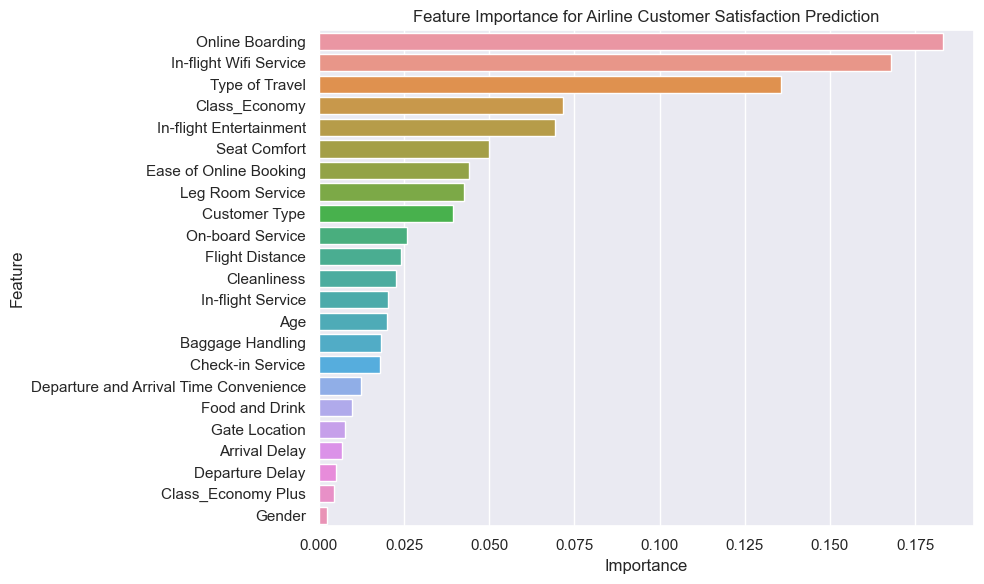

In [56]:
#  feature importances
importances = RF_Model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Airline Customer Satisfaction Prediction')
plt.tight_layout()
plt.show()

In [57]:
from xgboost import XGBClassifier
xgb= XGBClassifier(booster='gbtree')
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [59]:
print(accuracy_score(y_train,y_pred_train_xgb))
print()
print(accuracy_score(y_test,y_pred_test_xgb))

0.9865414228518633

0.9594394825993224


In [60]:
#apply K-Fold method - To increase the accuracy
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb,x_train,y_train,cv=10)
print(training_accuracy.mean())

0.9579611949491837


# Support Vector Machine(SVM)

In [61]:
from sklearn.metrics import accuracy_score,classification_report

In [62]:
from sklearn.svm import SVC
#kernel= 'Sigmoid'
svc_l_s = SVC(kernel ='sigmoid')
svc_sg = svc_l_s.fit(x_train,y_train)
y_pred_train_s = svc_l_s.predict(x_train)
y_pred_test_s = svc_l_s.predict(x_test)
accuracy_score_sg_train = accuracy_score(y_train,y_pred_train_s)
accuracy_score_sg_test = accuracy_score(y_test,y_pred_test_s)

In [63]:
print("Train Accuracy SVM: ",accuracy_score(y_train,y_pred_train_s))
print()
print("Train Accuracy SVM: ",accuracy_score(y_test,y_pred_test_s))

Train Accuracy SVM:  0.6135201724668925

Train Accuracy SVM:  0.6177805153475002


In [64]:
#Applying cross validation method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(svc_sg,x_train,y_train,cv=10)
print("accuracy", accuracy)
print()
print("accuracy_mean",accuracy.mean())
print()
print("accuracy.max",accuracy.max())

accuracy [0.60979366 0.60240222 0.61502926 0.62303665 0.63073606 0.61194949
 0.60702187 0.62611642 0.61194949 0.44748999]

accuracy_mean 0.5985525100092393

accuracy.max 0.6307360640591315


### 1. Predict Satisfaction Probabilities

In [65]:
probs = RF_Model.predict_proba(x)[:, 1]  # Probability of being 'Satisfied'

### 2. Create Segments Based on Probability Thresholds

In [66]:
df['Satisfaction_Prob'] = probs
def segment_customer(prob):
    if prob < 0.4:
        return 'High Risk'
    elif (prob < 0.7 and prob >0.4):
        return 'Medium Risk'
    else:
        return 'Low Risk'


df['Segment'] = df['Satisfaction_Prob'].apply(segment_customer)

In [67]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Economy,Class_Economy Plus,Satisfaction_Prob,Segment
0,1,0.566960,0,0,-0.370260,-0.333948,-0.261490,3,3,4,...,5,5,3,5,5,0,0,0,0.123487,High Risk
1,0,-0.292868,1,0,-0.370260,0.296454,0.623553,2,2,3,...,3,5,2,5,5,1,0,0,0.991533,Low Risk
2,1,0.103976,1,0,-0.338177,-0.386481,-0.391644,4,4,4,...,5,3,4,3,3,1,0,0,0.925222,Low Risk
3,1,0.699242,1,0,0.716545,-0.386481,-0.391644,2,2,3,...,4,5,2,5,5,1,0,0,0.996396,Low Risk
4,0,0.633101,1,0,2.285594,-0.386481,-0.365613,3,3,3,...,4,3,3,3,3,1,0,0,0.922189,Low Risk
